# Minimalbeispiel Parameterschätzung
## mit mehreren Messgrößen / mehreren Experimenten

In [6]:
# imports

import numpy as np
import pandas as pd
from lmfit import Parameters, report_fit

from model_funcs import sim_single_exp
from parest_funcs import par_est_main

In [7]:
# create parameter structure with initial fit parameter values, bounds, etc.

# Parameter structure
p0 = Parameters()
p0.add('mumax', value=0.5, min=0.0001, max=1.)
p0.add('Yxs', value=0.2, min=0.0001, max=1.)
p0.add('Ks', value=1.0, vary=False)
p0.add('base_coef', value=1.0, min=0.0001) # proportinality factor between biomass growth and base consumption, in [L/g]

### test simulation of a single experiment with dummy values

,cS,cX,V,base_rate
t,,,,
0.00,6.000000,0.400000,0.500000,0.085714
0.01,5.991411,0.401718,0.500000,0.086065
0.02,5.982787,0.403443,0.500000,0.086416
0.03,5.974128,0.405174,0.500000,0.086769
0.04,5.965433,0.406913,0.500000,0.087124
...,...,...,...,...
9.96,0.533045,7.851444,0.599215,0.817920
9.97,0.531383,7.862468,0.599415,0.817673
9.98,0.529742,7.873480,0.599615,0.817438


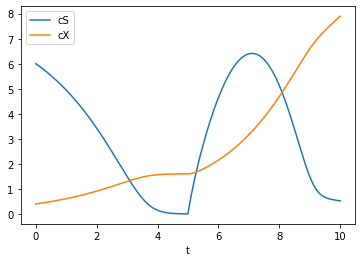

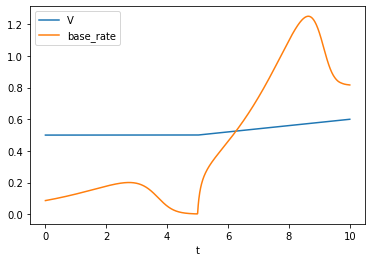

In [8]:
# control values
#          c[0] ... time point when feed was switched on [h]
#          c[1] ... feed rate [L/h]
#          c[2] ... substrate concentration in feed [g/L]
c = [5, .02, 200]

# initial values
#          y[0] ... substrate mass (mS) in [g]
#          y[1] ... bio dry mass (mX) in [g]
#          y[2] ... volume of fermentation broth [L]
y0 = [3, 0.2, .5]

# time grid in [h]
t_grid = np.linspace(0,10, 1001)

# run simulation
sim_exp = sim_single_exp(t_grid, y0, p0, c)

# plot results
display(sim_exp)
sim_exp.plot(y=['cS', 'cX'])
sim_exp.plot(y=['V', 'base_rate'])

### test parameter estimation with two dummy experiments

In [9]:
# define experiments to include
exp_list = { # key: name of experiment (arbitrary); value: filename of excel file
      'Experiment 1': './exp1.xlsx',
      'Experiment 2': './exp2.xlsx',
}
fit_results = par_est_main(exp_list, p0)

In [10]:
# print fit parameter values
report_fit(fit_results)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 55
    # data points      = 246
    # variables        = 3
    chi-square         = 41033.7719
    reduced chi-square = 168.863259
    Akaike info crit   = 1264.73752
    Bayesian info crit = 1275.25351
[[Variables]]
    mumax:      0.49973599 +/- 0.52600680 (105.26%) (init = 0.5)
    Yxs:        0.99849831 +/- 1.34595014 (134.80%) (init = 0.2)
    Ks:         1 (fixed)
    base_coef:  0.94303638 +/- 9.54811205 (1012.49%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(mumax, Yxs)       =  1.000
    C(mumax, base_coef) = -0.159
    C(Yxs, base_coef)   = -0.159
